## Import Libraries

The libraries required for developing the classification model will be imported in this section.

In [244]:
# Import baseline python libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Import libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for Data processing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Import libraries for Model Development

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Libraries for measuring model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Import libraries for model parameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV



## Read Data

The data in the file"Data Set.csv" consists of data elements related to loan approval. 

Data Dictionary for the data set for reference:


- BAD: 1 = Client defaulted on loan, 0 = loan repaid
- LOAN: Amount of loan approved.
- MORTDUE: Amount due on the existing mortgage.
- VALUE: Current value of the property.
- REASON: Reason for the loan request. (HomeImp = home improvement, DebtCon= debt
  consolidation which means taking out a new loan to pay off other liabilities and consumer debts)
- JOB: The type of job that loan applicant has such as manager, self, etc.
- YOJ: Years at present job.
- DEROG: Number of major derogatory reports (which indicates a serious delinquency or late
  payments).
- DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower
  does not make the minimum required payments 30 to 60 days past the day on which the payments
  were due).
- CLAGE: Age of the oldest credit line in months.
- NINQ: Number of recent credit inquiries.
- CLNO: Number of existing credit lines.
- DEBTINC: Debt-to-income ratio (all your monthly debt payments divided by your gross monthly
  income. This number is one way lenders measure your ability to manage the monthly payments to
  repay the money you plan to borrow.

In [2]:
# Reading the data in python

raw_df = pd.read_csv('Data Set.csv')

In [3]:
# Check if data loaded properly

raw_df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
# Checking if all records were read properly

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
raw_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960,NaN,NaN,NaN,0.199497,0.399656,0,0,0,0,1
LOAN,5960,NaN,NaN,NaN,18608,11207.5,1100,11100,16300,23300,89900
MORTDUE,5442,NaN,NaN,NaN,73760.8,44457.6,2063,46276,65019,91488,399550
VALUE,5848,NaN,NaN,NaN,101776,57385.8,8000,66075.5,89235.5,119824,855909
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445,NaN,NaN,NaN,8.92227,7.57398,0,3,7,13,41
DEROG,5252,NaN,NaN,NaN,0.25457,0.846047,0,0,0,0,10
DELINQ,5380,NaN,NaN,NaN,0.449442,1.12727,0,0,0,0,15
CLAGE,5652,NaN,NaN,NaN,179.766,85.8101,0,115.117,173.467,231.562,1168.23


## Milestone 1: Exploratory Data Analysis

In [6]:
# Checking quality of Data, whether missing values are present

raw_df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [7]:
raw_df.count()

BAD        5960
LOAN       5960
MORTDUE    5442
VALUE      5848
REASON     5708
JOB        5681
YOJ        5445
DEROG      5252
DELINQ     5380
CLAGE      5652
NINQ       5450
CLNO       5738
DEBTINC    4693
dtype: int64

In [8]:
len(raw_df)

5960

In [9]:
#Creating df to analyze missing values

raw_df_dq = pd.DataFrame({'complete_values':raw_df.count(),
                          'missing_values': raw_df.isna().sum() })

In [10]:
#Calculating %missing values
raw_df_dq['%missing'] = raw_df_dq['missing_values'].apply(lambda x : round((x / len(raw_df))*100,2))

In [11]:
raw_df_dq

,complete_values,missing_values,%missing
BAD,5960,0,0.00
LOAN,5960,0,0.00
MORTDUE,5442,518,8.69
VALUE,5848,112,1.88
REASON,5708,252,4.23
JOB,5681,279,4.68
YOJ,5445,515,8.64
DEROG,5252,708,11.88
DELINQ,5380,580,9.73
CLAGE,5652,308,5.17


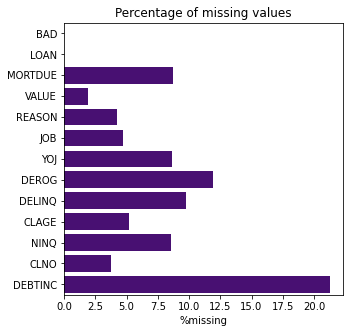

In [12]:
plt.figure(figsize=(5,5))
plt.title('Percentage of missing values')
sns.barplot(x = '%missing',y=raw_df_dq.index, data=raw_df_dq, color= 'indigo')

In [13]:
raw_df_dq.index

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

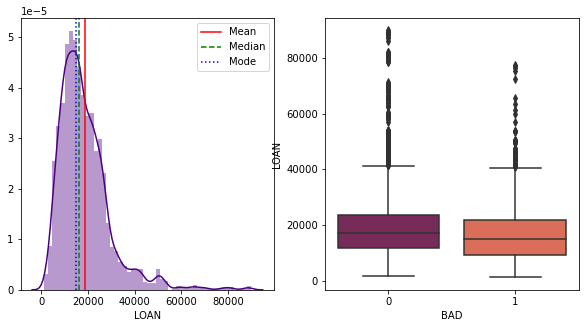

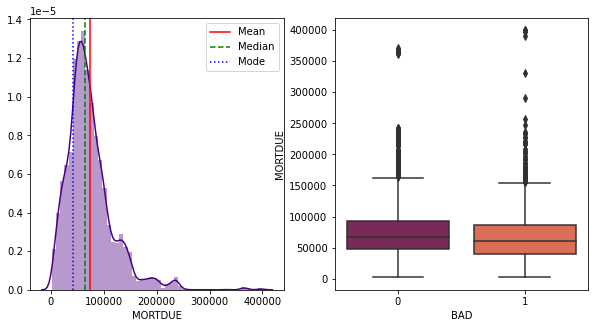

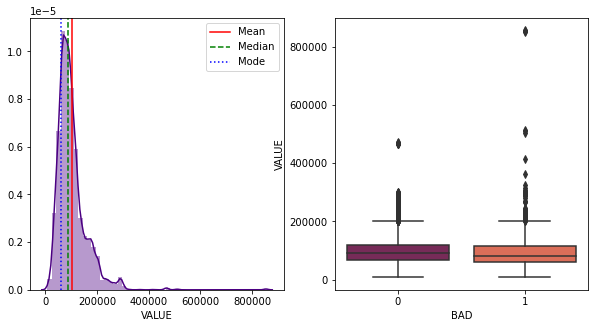

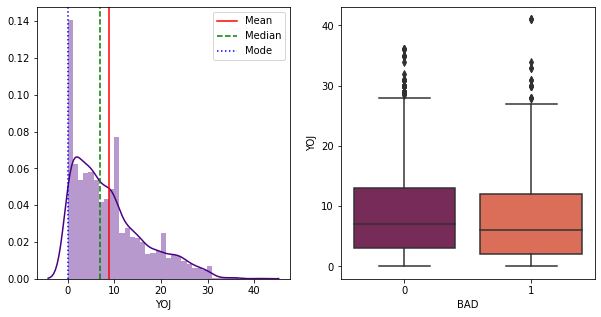

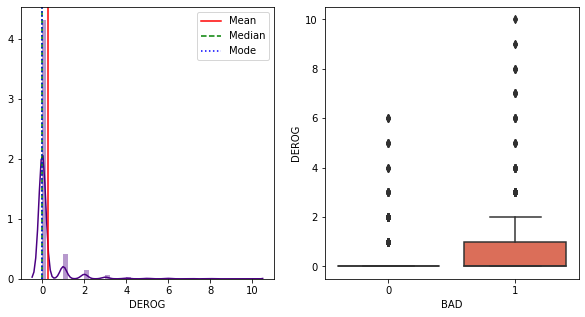

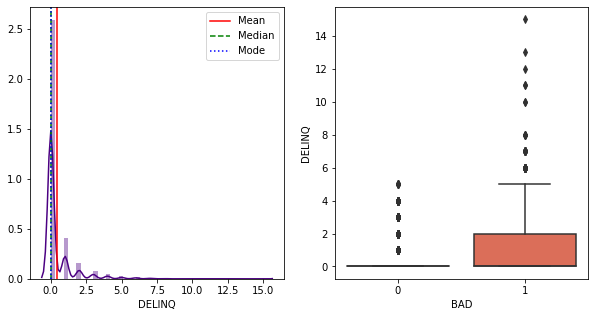

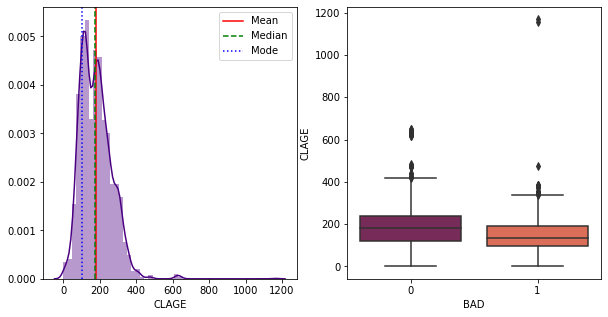

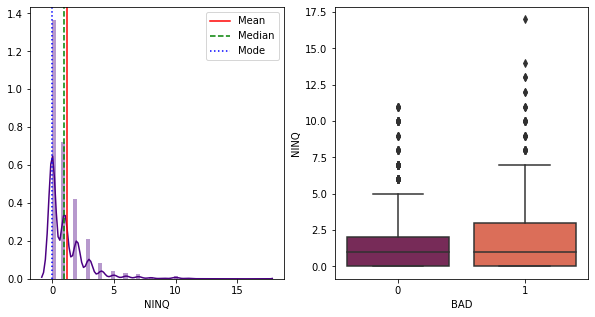

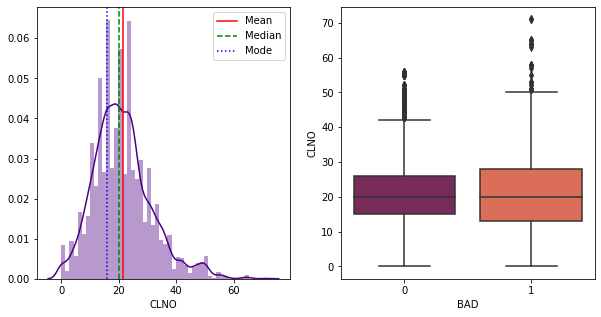

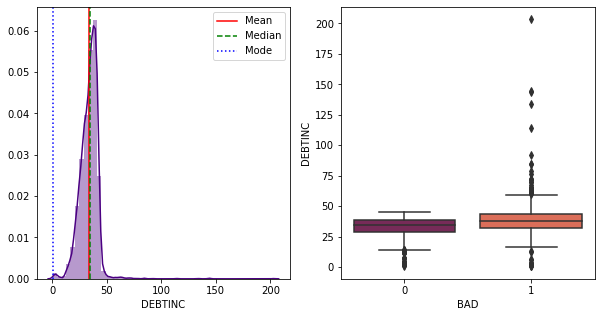

In [14]:
#Analysis of numeric variables

for i in ['LOAN', 'MORTDUE', 'VALUE','YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']:

    #Calculating mean, median & mode for the variables to plot
    mean=raw_df[i].mean()
    median=raw_df[i].median()
    mode=raw_df[i].mode()[0]
    
    plt.figure(figsize=(10,5))
    
    #Distplot to analyze the shape of the data
    plt.subplot(1, 2, 1)
    sns.distplot(raw_df[i],color= 'indigo',)
    plt.axvline(mean,color='r', linestyle='-')
    plt.axvline(median,color='g', linestyle='--')
    plt.axvline(mode,color='b', linestyle=':')
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
  
    #boxplot to analyze the outliers
    plt.subplot(1, 2, 2)
    bx = sns.boxplot(y=i,x='BAD',palette='rocket',data=raw_df)
    #plt.axhline(raw_df[i].mean(),color='r', linestyle='-')
    #plt.axvline(raw_df[i].median(),color='g', linestyle='--')
    #plt.axvline(raw_df[i].mode()[0],color='b', linestyle=':')
    plt.show()

### Insigts & Observations

1. Most of the independednt variables are right skewed.
2. Outliers exists however excpet of YOJ & CLAGE most of the other observations might be representative of real world scenario.
3. For YOJ, there are few observations which are greater than 30. We might consider them as outliers as this is generally not prevalent in current times.
4. For CLAGE, there are 2 observations greater than 1000 months ( approx 83 years). This is not usual we might consider them as outliers.
5. Defaulted loans (BAD = 1) has higher variance for DEROG & DELINQ variables. This might be an indication that customer with more deliquency reports and more delinquent credit lines are more likely to default the loans.


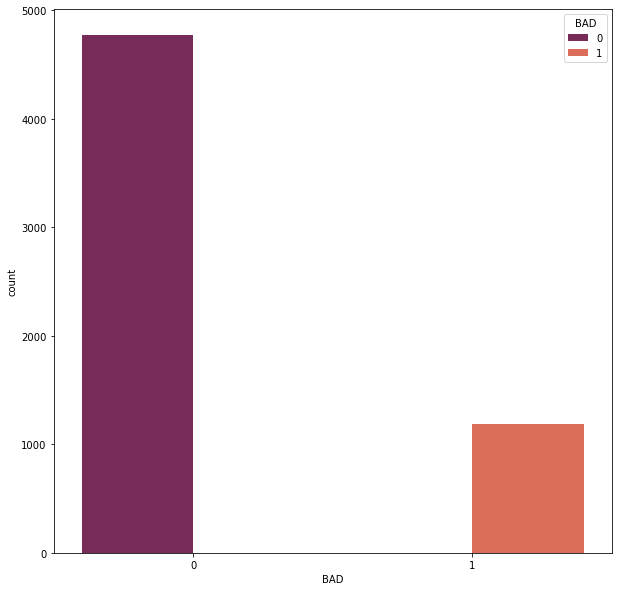

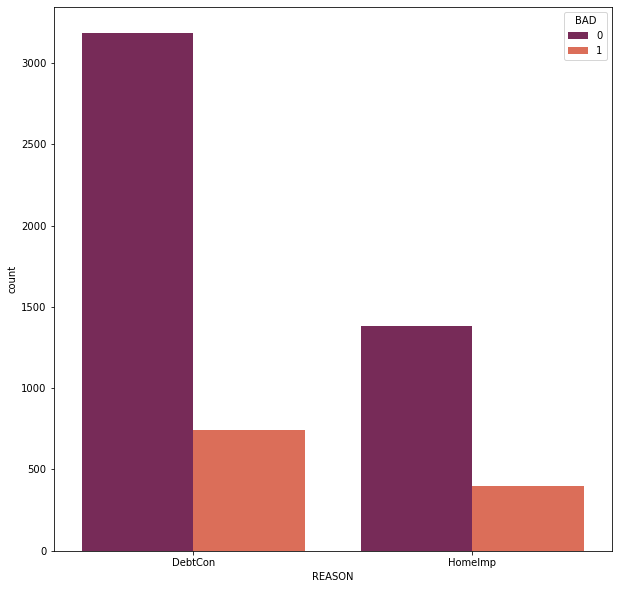

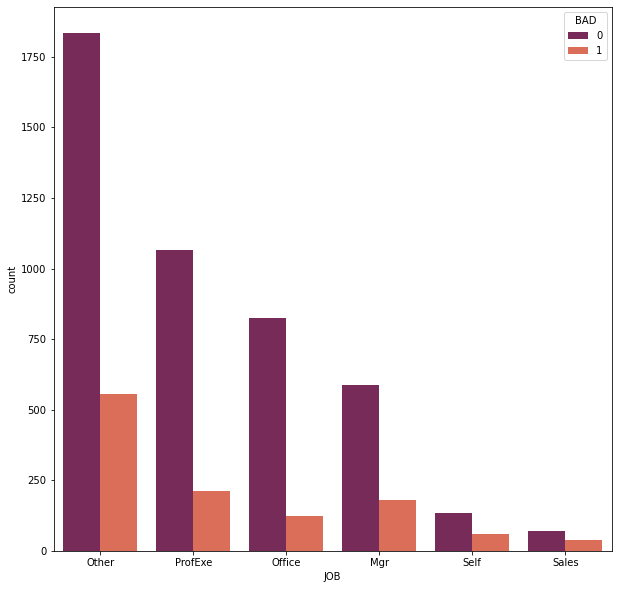

In [15]:
#Univariate Analysis of categorical variables

for i in ['BAD', 'REASON', 'JOB']:
    plt.figure(figsize=(10,10))
    #Countplot to analyze the classes in the categorical variables
    sns.countplot(raw_df[i], order = raw_df[i].value_counts().index,palette='rocket',hue=raw_df['BAD'])
    plt.show()

### Insigts & Observations

1. Target variable 'BAD' is imbalanced. 
2. Independent variables 'REASON' contains binary class, hence we can use label encoding during data preparation. 
3. Independent variable 'JOB' is multiclass but not ordinal, hence we will use one hot encoding during data preparation. 
4. JOB category 'Self' & 'Sales' have propotionaely higher defaulted loans when compared with all other JOB categories.


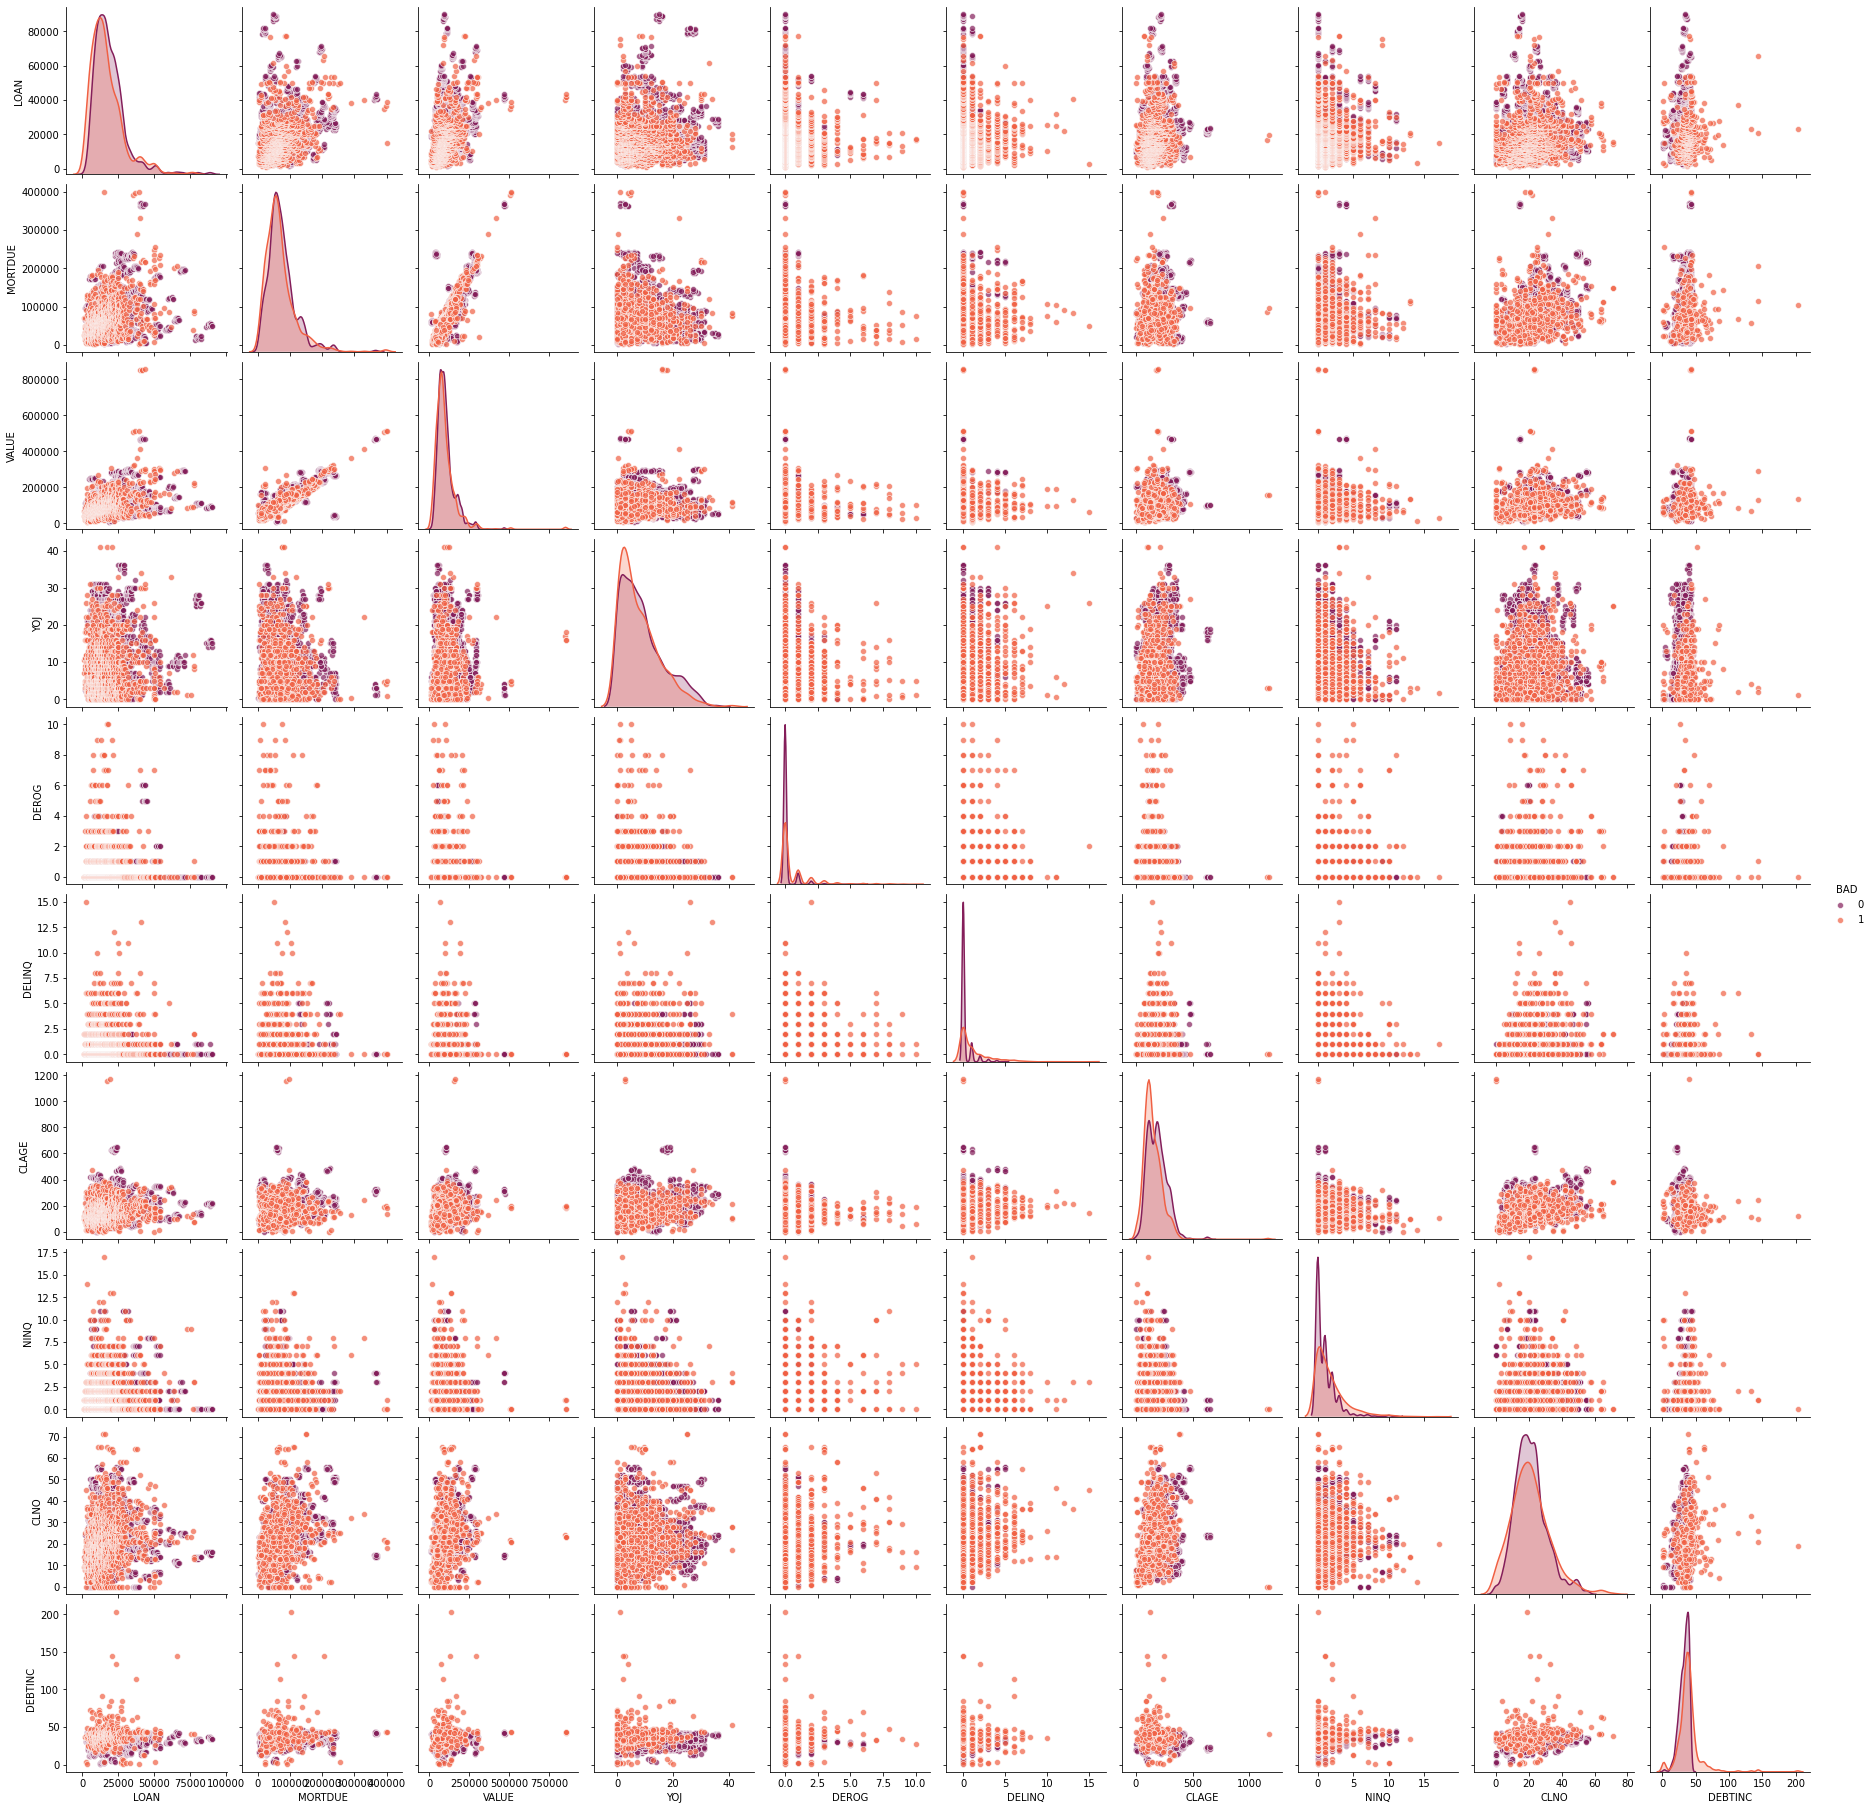

In [16]:
#Multivariate analysis

sns.pairplot(data=raw_df,hue='BAD',palette='rocket',corner=False,
            plot_kws={'alpha': 0.7})

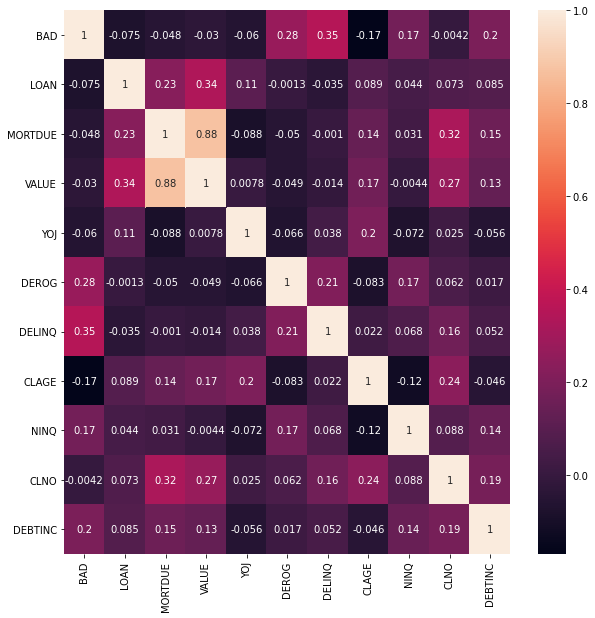

In [17]:
#Checking corelation 
plt.figure(figsize=(10,10))
sns.heatmap(raw_df.corr(),annot = True)

### Insights & Observation

1. There seems to be a stron co-linearity between VALUE & MORTDUE, we will evaluate to address this during model development.

In [18]:
#Crosstab Analysis

#checking the mean values for defaulted and repaid loans
raw_df.groupby('BAD').mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
0,19028.107315,74829.249055,102595.921018,9.154941,0.134217,0.245133,187.002355,1.032749,21.317036,33.253129
1,16922.119428,69460.452973,98172.846227,8.027802,0.707804,1.229185,150.190183,1.782765,21.211268,39.387645


In [19]:
#checking the mean values for defaulted and repaid loans
raw_df.groupby('BAD').median()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
0,16900,66839.0,90659.0,7.0,0.0,0.0,180.415787,1.0,20.0,34.541671
1,14900,60279.0,82000.0,6.0,0.0,0.0,132.866667,1.0,20.0,38.079762


In [20]:
#analyzing JOB categories 
pd.crosstab(raw_df['JOB'],raw_df['BAD'],normalize='index')

BAD,0,1
JOB,,
Mgr,0.766623,0.233377
Office,0.868143,0.131857
Other,0.768007,0.231993
ProfExe,0.833856,0.166144
Sales,0.651376,0.348624
Self,0.699482,0.300518


In [21]:
#analyzing JOB categories 
pd.crosstab(raw_df['JOB'],raw_df['BAD'],normalize='columns')

BAD,0,1
JOB,,
Mgr,0.130233,0.153516
Office,0.182281,0.107204
Other,0.406202,0.475129
ProfExe,0.235659,0.181818
Sales,0.015725,0.032590
Self,0.029900,0.049743


In [22]:
#analyzing REASON categories 
pd.crosstab(raw_df['REASON'],raw_df['BAD'],normalize='index')

BAD,0,1
REASON,,
DebtCon,0.810336,0.189664
HomeImp,0.777528,0.222472


In [23]:
#analyzing REASON categories 
pd.crosstab(raw_df['REASON'],raw_df['BAD'],normalize='columns')

BAD,0,1
REASON,,
DebtCon,0.696956,0.652936
HomeImp,0.303044,0.347064


## Milestone 2. Data Preparation

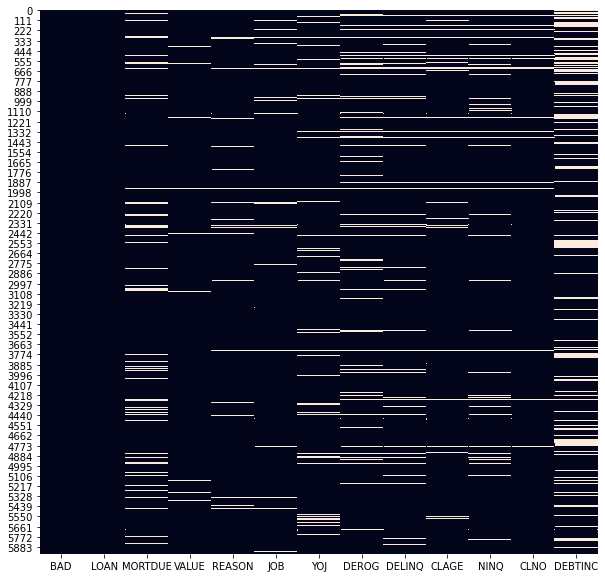

In [24]:
#Visual analysis of null values in the data

plt.figure(figsize=(10,10))

sns.heatmap(raw_df.isnull(), cbar=False)

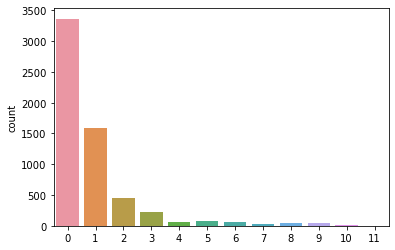

In [25]:
# Check rows with more than 10 missing data
sns.countplot(raw_df.isna().sum(axis=1))

In [26]:
rec_var_miss=raw_df.isna().sum(axis =1)
rec_var_miss.name='cnt#'
rec_var_miss.reset_index().groupby('cnt#').count()

,index
cnt#,
0,3364
1,1589
2,449
3,219
4,64
5,83
6,66
7,25
8,39


### Insights & Observation

1. There seems more than 60 records which has atleast 9 missing variables.
2. We will delete the 13 records which has more than 9 missing variables

In [27]:
raw_df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [28]:
#Checking for duplicates with target variable

raw_df.duplicated().sum()

0

In [29]:
#Checking for duplicates without target variable
cols_indp = ['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
raw_df.duplicated().sum()

0

### Insights & Observation

1. There are no duplicate records.

In [30]:
#Create new data frame with records with max 9 missing variable

df=raw_df[raw_df.isna().sum(axis=1) < 10].copy()

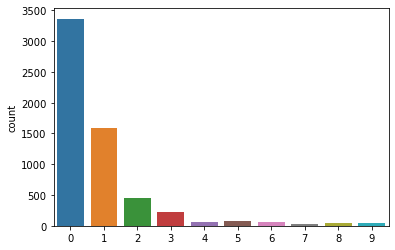

In [31]:
sns.countplot(df.isna().sum(axis=1))

### MORTDUE

In [32]:
#Checking for missing values with respect to target variables
pd.crosstab(df['MORTDUE'].isna(),df['BAD'],normalize='columns')


BAD,0,1
MORTDUE,,
False,0.915949,0.911616
True,0.084051,0.088384


In [33]:
df.groupby('BAD')['MORTDUE'].mean()

BAD
0    74829.249055
1    69460.452973
Name: MORTDUE, dtype: float64

In [34]:
df.groupby('BAD')['MORTDUE'].median()

BAD
0    66839.0
1    60279.0
Name: MORTDUE, dtype: float64

In [35]:
# We will use O as imputation method to update missing values, 
# there is no data to conclude that these clients have outstanding 
# due amounts on existing lons

df['cMORTDUE'] = df['MORTDUE'].fillna(value = 0)

In [36]:
#Checking for missing values with respect to target variables
df['cMORTDUE'].isna().sum()

0

### VALUE

In [37]:
#Checking for missing values with respect to target variables
pd.crosstab(df['VALUE'].isna(),df['BAD'])

BAD,0,1
VALUE,,
False,4759,1084
True,0,104


In [38]:
df.groupby('BAD')['VALUE'].mean()

BAD
0    102622.045331
1     98172.846227
Name: VALUE, dtype: float64

In [39]:
df.groupby('BAD')['VALUE'].median()

BAD
0    90727.0
1    82000.0
Name: VALUE, dtype: float64

In [40]:
# Home Equity loans are type of loans that are taken against the true
# market value of a house.
# Market Value = Total Asset - Total Liablities
# If the current value of propoery is 0 , all such loans will be rejected because
# home equity loans borrow money against value of property. 
# There exist evidence that loans with VALUE 0 are also approved, this indicates that 
# the variable VALUE contain geniuine missing values.
# With this assumption we will use average value to impute the missing data.
# Since there seems to be a significatnt difference in mean and median values for repaid
# and defaluted loans we will use corresponding averages to impute the values


In [41]:
#Imputing for defaulted loans
avg_loan_bad_1 = df.loc[df['BAD'] == 1]['VALUE'].mean()
df['cVALUE'] =df['VALUE']
df.loc[(df['BAD'] == 1) & (df['cVALUE'].isna()),'cVALUE'] = avg_loan_bad_1

In [42]:
df['cVALUE'].isna().sum()

0

### Reason

In [43]:
pd.crosstab(df['REASON'].isna(),df['BAD'])

BAD,0,1
REASON,,
False,4567,1141
True,192,47


In [44]:
#Reason is a categorical variable, it not feasible to apply for a loan 
#without a valid reason, Home Equity loans are generaly applied for 
#home improvement or for using the money to manage other debts.
#We will use the mode, most common reason to impute the value

df.groupby('REASON')['BAD'].count()

#DebtCon seems to be the most popular reason for takig loans

REASON
DebtCon    3928
HomeImp    1780
Name: BAD, dtype: int64

In [45]:
df['cREASON'] = df['REASON'].fillna(value = 'DebtCon')

In [46]:
df['cREASON'].isna().sum()

0

### JOB

In [47]:
pd.crosstab(df['JOB'].isna(),df['BAD'])

BAD,0,1
JOB,,
False,4515,1166
True,244,22


In [48]:
df.groupby('JOB')['BAD'].count()

JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: BAD, dtype: int64

In [49]:
# Checking if loans are approved with out JOB and YOJ params
df.loc[(df['JOB'].isna()) & (df['YOJ'].isna())].groupby('BAD')['BAD'].count()

BAD
0    82
1     5
Name: BAD, dtype: int64

In [50]:
# Checking if loans are approved with out JOB but with YOJ params
df.loc[(df['JOB'].isna()) & (df['YOJ'] >= 0)].groupby('BAD')['BAD'].count()

BAD
0    162
1     17
Name: BAD, dtype: int64

In [51]:
#For scenario when JOB and YOJ both are missing
# we will update value for JOB as 'Unknown'
df['cJOB']=df['JOB']
df.loc[(df['JOB'].isna()) & (df['YOJ'].isna()),'cJOB'] = 'Unknown'

In [52]:
#For scenario when JOB is missing and YOJ exists 
# we will update missing value for JOB as 'Other'
df.loc[(df['JOB'].isna()) & (df['YOJ'] >= 0),'cJOB'] = 'Other'

In [53]:
df['cJOB'].isna().sum()

0

In [54]:
df.groupby('cJOB')['BAD'].count()

cJOB
Mgr         767
Office      948
Other      2567
ProfExe    1276
Sales       109
Self        193
Unknown      87
Name: BAD, dtype: int64

### YOJ

In [55]:
pd.crosstab(df['YOJ'].isna(),df['BAD'])

BAD,0,1
YOJ,,
False,4321,1124
True,438,64


In [56]:
# Checking missing YOJ variable for JOB category
df[df['YOJ'].isna()].groupby('cJOB')['cJOB'].count()

cJOB
Mgr         34
Office      35
Other      308
ProfExe     18
Sales       10
Self        10
Unknown     87
Name: cJOB, dtype: int64

In [57]:
df.groupby('cJOB')['YOJ'].mean().round()

cJOB
Mgr        9.0
Office     8.0
Other      9.0
ProfExe    9.0
Sales      7.0
Self       7.0
Unknown    NaN
Name: YOJ, dtype: float64

In [58]:
# We will replace missing value of YOJ variable with average of respective
# JOB type, we will not replace YOJ = 0
df['cYOJ']=df['YOJ']

df.loc[(df['cYOJ'].isna()) & (df['cJOB']=='Mgr'),'cYOJ'] = 9.0
df.loc[(df['cYOJ'].isna()) & (df['cJOB']=='Office'),'cYOJ'] = 8.0
df.loc[(df['cYOJ'].isna()) & (df['cJOB']=='Other'),'cYOJ'] = 9.0
df.loc[(df['cYOJ'].isna()) & (df['cJOB']=='ProfExe'),'cYOJ'] = 9.0
df.loc[(df['cYOJ'].isna()) & (df['cJOB']=='Sales'),'cYOJ'] = 7.0
df.loc[(df['cYOJ'].isna()) & (df['cJOB']=='Self'),'cYOJ'] = 7.0
df.loc[(df['cYOJ'].isna()) & (df['cJOB']=='Unknown'),'cYOJ'] = 0.0

In [59]:
df.groupby('cJOB')['cYOJ'].mean().round()

cJOB
Mgr        9.0
Office     8.0
Other      9.0
ProfExe    9.0
Sales      7.0
Self       7.0
Unknown    0.0
Name: cYOJ, dtype: float64

In [60]:
    df['cYOJ'].sort_values(ascending=False)

3160    41.0
3870    41.0
1827    41.0
5073    36.0
5287    36.0
        ... 
418      0.0
1160     0.0
415      0.0
5166     0.0
1072     0.0
Name: cYOJ, Length: 5947, dtype: float64

In [61]:
#Outlier Treatment for YOJ > 30, update to 30 as its not usual to be in a current job
#for more that 30 years

df.loc[ (df['cYOJ'] > 30 ),'cYOJ'] = 30.0

In [62]:
 df['cYOJ'].sort_values(ascending=False)

5579    30.0
5564    30.0
2485    30.0
965     30.0
1610    30.0
        ... 
418      0.0
1160     0.0
415      0.0
5166     0.0
1072     0.0
Name: cYOJ, Length: 5947, dtype: float64

### DEROG

In [63]:
pd.crosstab(df['DEROG'].isna(),df['BAD'])

BAD,0,1
DEROG,,
False,4150,1102
True,609,86


In [64]:
df.groupby('BAD')['DEROG'].mean()

BAD
0    0.134217
1    0.707804
Name: DEROG, dtype: float64

In [65]:
#For loans being repaid we will update missing values with 0 (closer to average)
#For loans defaulted we will update values as 1 (closer to average)

df['cDEROG']=df['DEROG']
df.loc[(df['cDEROG'].isna()) & (df['BAD']==0),'cDEROG'] = 0
df.loc[(df['cDEROG'].isna()) & (df['BAD']==1),'cDEROG'] = 1


In [66]:
df['cDEROG'].isna().sum()

0

### DELINQ

In [67]:
pd.crosstab(df['DELINQ'].isna(),df['BAD'])

BAD,0,1
DELINQ,,
False,4263,1117
True,496,71


In [68]:
df.groupby('BAD')['DELINQ'].mean()

BAD
0    0.245133
1    1.229185
Name: DELINQ, dtype: float64

In [69]:
pd.crosstab(df['DELINQ'],df['BAD'])

BAD,0,1
DELINQ,,
0.0,3596,583
1.0,432,222
2.0,138,112
3.0,58,71
4.0,32,46
5.0,7,31
6.0,0,27
7.0,0,13
8.0,0,5


In [70]:
#For loans being repaid we will update missing values with 0 (closer to average)
#For loans defaulted we will update values as 1 (closer to average)

df['cDELINQ']=df['DELINQ']
df.loc[(df['cDELINQ'].isna()) & (df['BAD']==0),'cDELINQ'] = 0
df.loc[(df['cDELINQ'].isna()) & (df['BAD']==1),'cDELINQ'] = 1

In [71]:
df['cDELINQ'].isna().sum()

0

### CLAGE

In [72]:
pd.crosstab(df['CLAGE'].isna(),df['BAD'])

BAD,0,1
CLAGE,,
False,4541,1111
True,218,77


In [73]:
df.groupby('BAD')['CLAGE'].mean()

BAD
0    187.002355
1    150.190183
Name: CLAGE, dtype: float64

In [74]:
# we will update missing values with respective average
df['cCLAGE']=df['CLAGE']
df.loc[(df['cCLAGE'].isna()) & (df['BAD']==0),'cCLAGE'] = 187
df.loc[(df['cCLAGE'].isna()) & (df['BAD']==1),'cCLAGE'] = 150

In [75]:
df['cCLAGE'].isna().sum()

0

In [76]:
#Outlier Treatmet for CLAGE, upadate to next max value 54
df['cCLAGE'].sort_values(ascending=False)

3679    1168.233561
3097    1154.633333
4470     649.747104
4536     648.328493
4264     639.058172
           ...     
450        2.033333
1091       0.507115
954        0.486711
2335       0.000000
5810       0.000000
Name: cCLAGE, Length: 5947, dtype: float64

In [77]:
df.loc[ (df['cCLAGE'] > 1000 ),'cCLAGE'] = 649.747104

In [78]:
df['cCLAGE'].sort_values(ascending=False)

4470    649.747104
3679    649.747104
3097    649.747104
4536    648.328493
4264    639.058172
           ...    
450       2.033333
1091      0.507115
954       0.486711
2335      0.000000
5810      0.000000
Name: cCLAGE, Length: 5947, dtype: float64

### NINQ

In [79]:
pd.crosstab(df['NINQ'].isna(),df['BAD'])

BAD,0,1
NINQ,,
False,4336,1114
True,423,74


In [80]:
df.groupby('BAD')['NINQ'].mean()

BAD
0    1.032749
1    1.782765
Name: NINQ, dtype: float64

In [81]:
# we will update missing values with respective nearest average
# for defaulted and repaid loans

df['cNINQ']=df['NINQ']
df.loc[(df['cNINQ'].isna()) & (df['BAD']==0),'cNINQ'] = 1
df.loc[(df['cNINQ'].isna()) & (df['BAD']==1),'cNINQ'] = 2

In [82]:
df['cNINQ'].isna().sum()

0

### CLNO

In [83]:
pd.crosstab(df['CLNO'].isna(),df['BAD'])

BAD,0,1
CLNO,,
False,4602,1136
True,157,52


In [84]:
df.groupby('BAD')['CLNO'].median()

BAD
0    20.0
1    20.0
Name: CLNO, dtype: float64

In [85]:
## we will update missing values with respective nearest average
# for defaulted and repaid loans

df['cCLNO']=df['CLNO']
df.loc[(df['cCLNO'].isna()) & (df['BAD']==0),'cCLNO'] = 21.0
df.loc[(df['cCLNO'].isna()) & (df['BAD']==1),'cCLNO'] = 21.0

In [86]:
df['cCLNO'].isna().sum()

0

### DEBTINC

In [87]:
pd.crosstab(df['DEBTINC'].isna(),df['BAD'])

BAD,0,1
DEBTINC,,
False,4284,403
True,475,785


In [88]:
df.groupby('BAD')['DEBTINC'].mean()

BAD
0    33.263833
1    39.387645
Name: DEBTINC, dtype: float64

In [89]:
## we will update missing values with respective nearest average
# for defaulted and repaid loans

df['cDEBTINC']=df['DEBTINC']
df.loc[(df['cDEBTINC'].isna()) & (df['BAD']==0),'cDEBTINC'] = 33.263833
df.loc[(df['cDEBTINC'].isna()) & (df['BAD']==1),'cDEBTINC'] = 39.387645

In [90]:
df['cDEBTINC'].isna().sum()

0

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BAD       5947 non-null   int64  
 1   LOAN      5947 non-null   int64  
 2   MORTDUE   5442 non-null   float64
 3   VALUE     5843 non-null   float64
 4   REASON    5708 non-null   object 
 5   JOB       5681 non-null   object 
 6   YOJ       5445 non-null   float64
 7   DEROG     5252 non-null   float64
 8   DELINQ    5380 non-null   float64
 9   CLAGE     5652 non-null   float64
 10  NINQ      5450 non-null   float64
 11  CLNO      5738 non-null   float64
 12  DEBTINC   4687 non-null   float64
 13  cMORTDUE  5947 non-null   float64
 14  cVALUE    5947 non-null   float64
 15  cREASON   5947 non-null   object 
 16  cJOB      5947 non-null   object 
 17  cYOJ      5947 non-null   float64
 18  cDEROG    5947 non-null   float64
 19  cDELINQ   5947 non-null   float64
 20  cCLAGE    5947 non-null   floa

In [92]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'cMORTDUE', 'cVALUE',
       'cREASON', 'cJOB', 'cYOJ', 'cDEROG', 'cDELINQ', 'cCLAGE', 'cNINQ',
       'cCLNO', 'cDEBTINC'],
      dtype='object')

In [93]:
#Creating dataset after treating missing values and outliers

df_c = df[['BAD', 'LOAN','cMORTDUE', 'cVALUE',
       'cREASON', 'cJOB', 'cYOJ', 'cDEROG', 'cDELINQ', 'cCLAGE', 'cNINQ',
       'cCLNO', 'cDEBTINC' ]].copy()

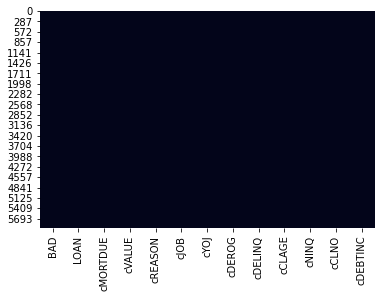

In [94]:

#We have treated all missing values
sns.heatmap(df_c.isna(),cbar=False)

In [95]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BAD       5947 non-null   int64  
 1   LOAN      5947 non-null   int64  
 2   cMORTDUE  5947 non-null   float64
 3   cVALUE    5947 non-null   float64
 4   cREASON   5947 non-null   object 
 5   cJOB      5947 non-null   object 
 6   cYOJ      5947 non-null   float64
 7   cDEROG    5947 non-null   float64
 8   cDELINQ   5947 non-null   float64
 9   cCLAGE    5947 non-null   float64
 10  cNINQ     5947 non-null   float64
 11  cCLNO     5947 non-null   float64
 12  cDEBTINC  5947 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 650.5+ KB


## Encoding of Categorical Variables

In [96]:
#Seperating Dependent and Independent Variables

y = df_c['BAD']
y.astype('category')

X = df_c.drop(columns=['BAD'])


In [97]:
#Categorical independent variable

dummy_var = ['cREASON', 'cJOB']

#Using get_Dummies to encode categorical variables

X = pd.get_dummies(data=X,columns=dummy_var, drop_first=True)

In [98]:
#Checking shape of X

X.shape

(5947, 17)

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5959
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LOAN             5947 non-null   int64  
 1   cMORTDUE         5947 non-null   float64
 2   cVALUE           5947 non-null   float64
 3   cYOJ             5947 non-null   float64
 4   cDEROG           5947 non-null   float64
 5   cDELINQ          5947 non-null   float64
 6   cCLAGE           5947 non-null   float64
 7   cNINQ            5947 non-null   float64
 8   cCLNO            5947 non-null   float64
 9   cDEBTINC         5947 non-null   float64
 10  cREASON_HomeImp  5947 non-null   uint8  
 11  cJOB_Office      5947 non-null   uint8  
 12  cJOB_Other       5947 non-null   uint8  
 13  cJOB_ProfExe     5947 non-null   uint8  
 14  cJOB_Sales       5947 non-null   uint8  
 15  cJOB_Self        5947 non-null   uint8  
 16  cJOB_Unknown     5947 non-null   uint8  
dtypes: float64(9),

## Spliting Data for Train and Test

In [100]:
#Spliting data 80% for training 20% for testing
#Since we are dealing with imbalanced data we will stratify the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=27,stratify=y)

In [101]:
#Checking Shape of split dataset
print('Train Dataset', X_train.shape)
print('\nTest Dataset', X_test.shape)


Train Dataset (4757, 17)

Test Dataset (1190, 17)


In [102]:
#Spliting data for validaing the model 80% for training 20% for validating
#Since we are dealing with imbalanced data we will stratify the target variable

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30,random_state=27,stratify=y_train)

In [103]:
#Checking Shape of split dataset
print('Train Dataset', X_train.shape)
print('\nTest Dataset', X_val.shape)

Train Dataset (3329, 17)

Test Dataset (1428, 17)


## Scaling Data

In [104]:
#Using standard scaler for scaling numerical data

scale = StandardScaler()

#Fit & tranform Train data
X_train_s = scale.fit_transform(X_train)

#Apply the learning from Train data to the validate dataset, transform only
X_val_s = scale.transform(X_val)

In [105]:
X_train_s = pd.DataFrame(data=X_train_s,columns=X_train.columns)
X_val_s = pd.DataFrame(data=X_val_s,columns=X_train.columns)

In [106]:
X_train_s.describe()

,LOAN,cMORTDUE,cVALUE,cYOJ,cDEROG,cDELINQ,cCLAGE,cNINQ,cCLNO,cDEBTINC,cREASON_HomeImp,cJOB_Office,cJOB_Other,cJOB_ProfExe,cJOB_Sales,cJOB_Self,cJOB_Unknown
count,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03,3.329000e+03
mean,-1.089379e-16,2.911125e-16,-2.708024e-17,-1.029516e-16,2.232452e-16,1.676674e-16,-2.840090e-16,5.496088e-17,1.679175e-17,-7.223953e-16,-7.699525e-16,-8.106396e-16,-3.191266e-16,7.176930e-17,-2.007673e-16,1.291064e-15,-4.688183e-17
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-1.555543e+00,-1.425099e+00,-1.631142e+00,-1.212366e+00,-3.014673e-01,-3.741750e-01,-2.129420e+00,-7.158182e-01,-2.111900e+00,-4.626880e+00,-6.665220e-01,-4.448740e-01,-8.661772e-01,-5.229982e-01,-1.377594e-01,-1.831119e-01,-1.157334e-01
25%,-6.678636e-01,-6.116052e-01,-6.151224e-01,-7.969885e-01,-3.014673e-01,-3.741750e-01,-7.398002e-01,-7.158182e-01,-7.104418e-01,-5.006395e-01,-6.665220e-01,-4.448740e-01,-8.661772e-01,-5.229982e-01,-1.377594e-01,-1.831119e-01,-1.157334e-01
50%,-1.885166e-01,-1.039998e-01,-1.876384e-01,-1.046928e-01,-3.014673e-01,-3.741750e-01,-5.763802e-02,-1.146682e-01,-9.712719e-03,1.448765e-01,-6.665220e-01,-4.448740e-01,-8.661772e-01,-5.229982e-01,-1.377594e-01,-1.831119e-01,-1.157334e-01
75%,3.884751e-01,4.460973e-01,3.060254e-01,4.491437e-01,-3.014673e-01,-3.741750e-01,5.744499e-01,4.864819e-01,4.908080e-01,6.897693e-01,1.500325e+00,-4.448740e-01,1.154498e+00,-5.229982e-01,-1.377594e-01,-1.831119e-01,-1.157334e-01
max,6.318175e+00,7.228102e+00,1.347852e+01,2.941408e+00,1.211914e+01,1.330403e+01,5.587764e+00,7.700282e+00,4.394870e+00,1.090398e+01,1.500325e+00,2.247827e+00,1.154498e+00,1.912052e+00,7.259032e+00,5.461142e+00,8.640549e+00


## Milestone 2. Model Development

### Logistic Regression Model
We will develop a logistic regression model as a baseline model.

In [113]:
lr = LogisticRegression(random_state=27)

#Fitting on unscaled data
lr.fit(X_train,y_train)

#Predicting the validation dataset 
y_lr_p = lr.predict(X_val)

In [114]:
#Checking model performance

print(classification_report(y_val, y_lr_p))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1143
           1       0.61      0.14      0.23       285

    accuracy                           0.81      1428
   macro avg       0.71      0.56      0.56      1428
weighted avg       0.78      0.81      0.76      1428



Eventhough overall model accuracy is 81% , the recall value for default loan is only 14%. We will evaluate whether using scaled data improves model performance.

In [115]:
lr1 = LogisticRegression(random_state=27)

#Fitting on scaled data
lr1.fit(X_train_s,y_train)

#Predicting the validation dataset 
y_lr_p1 = lr1.predict(X_val_s)


In [116]:
#Checking model performance

print(classification_report(y_val, y_lr_p1))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1143
           1       0.74      0.47      0.58       285

    accuracy                           0.86      1428
   macro avg       0.81      0.72      0.75      1428
weighted avg       0.85      0.86      0.85      1428



The model is performing considerably well on the scaled data, overall model accuracy has improved to 86% and recall score has increased to 47%.

In [125]:
#We know that the data set is highly imbalanced, lets check the distribution of target variable
#in the training data set
y_train.value_counts()

0    2664
1     665
Name: BAD, dtype: int64

In [126]:
#We will now use SMOTE to handle imbalance data
#We will use SMOTE to ensure the train dataset contains atlease 40% minority class
smt = SMOTE(random_state=27, sampling_strategy = 0.4)

#We will use the scaled dataset from previous iteration
X_train_smt,y_train_smt = smt.fit_resample(X_train_s,y_train)

In [127]:
y_train_smt.value_counts()

0    2664
1    1065
Name: BAD, dtype: int64

In [128]:
#Fitting the model on the oversampled data

lr2 = LogisticRegression(random_state=27)

#Fitting on scaled data
lr2.fit(X_train_smt,y_train_smt)

#Predicting the validation dataset 
y_lr_p2 = lr2.predict(X_val_s)


In [129]:
#Checking model performance with oversampled minority class

print(classification_report(y_val, y_lr_p2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1143
           1       0.65      0.59      0.62       285

    accuracy                           0.86      1428
   macro avg       0.78      0.75      0.76      1428
weighted avg       0.85      0.86      0.85      1428



The model is performing considerably well on the scaled data, overall model accuracy is same 86% but the recall score has increased to 59%.

In [178]:
# We will try RandomSearch to improve model performance

#Set the parameters to be tuned
param_grid = {
    'penalty': ['l1', 'l2','none','elasticnet'], 
    'fit_intercept' : [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 300, 500, 1000]
}

#initiating LR model for tuning, we will use the scoring methods as recall

lr3=LogisticRegression(random_state=27)

#Initialize RandomSearch
random = RandomizedSearchCV(estimator=lr3, param_distributions=param_grid, 
                            cv = 5, scoring = 'recall', n_jobs=-1, verbose = 2, 
                            random_state = 27)


In [179]:
#Fiting the training data to find the best parameters

random_lr = random.fit(X_train_smt,y_train_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [180]:
#Print the best parameters

print("Best: %f using %s " % (random_lr.best_score_, random_lr.best_params_))

Best: 0.823474 using {'solver': 'saga', 'penalty': 'l2', 'max_iter': 300, 'fit_intercept': False} 


In [181]:
#We will further fine tune the prameters using grid search

param_grid_1 = {
    'penalty': ['l1', 'l2','elasticnet'], 
    'fit_intercept' : [True, False],
    'solver': ['lbfgs', 'saga', 'sag'],
    'max_iter': [ 200, 300, 400]
}

#Initialize GridSearch

grid = GridSearchCV(estimator=lr3, param_grid=param_grid_1, 
                            cv = 5, scoring = 'recall', n_jobs=-1, verbose = 3, 
                            )

In [182]:
grid_lr = grid.fit(X_train_smt,y_train_smt)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 156 out of 270 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished


In [183]:
print("Best: %f using %s" % (grid_lr.best_score_, grid_lr.best_params_))

Best: 0.823474 using {'fit_intercept': False, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}


In [184]:
#Initializing logistic regression using the identified parameters

lr4 = LogisticRegression(penalty='l1',solver= 'saga',fit_intercept= False, 
                         max_iter= 200, random_state=27)

#Fitting on scaled data
lr4.fit(X_train_smt,y_train_smt)

#Predicting the validation dataset 
y_lr_p4 = lr4.predict(X_val_s)




In [185]:
#Checking model performance after parameter tuning

print(classification_report(y_val, y_lr_p4))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1143
           1       0.43      0.81      0.56       285

    accuracy                           0.75      1428
   macro avg       0.68      0.77      0.69      1428
weighted avg       0.84      0.75      0.77      1428



By using parameter tuning techniques we are able to improve the recall score of the defaulted loans at the cost of overall model accuracy.

In [190]:
#Checking the AUC ROC score
pred_prob = lr4.predict_proba(X_val_s)
auc_score = roc_auc_score(y_val,pred_prob[:,1])

print('AUC Score', auc_score)

AUC Score 0.8556983008702859


The AUC score indicates that the model is able to differentiate between Repaid and Defaulted loans for #85% of the val dataset

### KNN Model

In [194]:
#Initialize baseline model to find best value of k

knn = KNeighborsClassifier()

In [199]:
# We select the best value of k for which the error rate is the least in the validation data
# Loop over a few values of the k to determine the best k

train_error = []
val_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X_train.columns


#iterate for range of 1 to 15

for k in range(1,15):
    train_error = [] #store error on train data
    val_error = [] #store error on validation data
    lista = [] #list of errors
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        knn.fit(X_train_smt, y_train_smt)
        train_error.append(1 - knn.score(X_train_smt, y_train_smt)) 
        val_error.append(1 - knn.score(X_val_s, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(val_error)/len(val_error))
    knn_many_split[k] = lista #dictionary of errors

knn_many_split

{1: [0.0, 0.06162464985994398],
 2: [0.02574416733708773, 0.08473389355742307],
 3: [0.020380799141861083, 0.07633053221288509],
 4: [0.049342987396084746, 0.0952380952380953],
 5: [0.04290694556181283, 0.09173669467787123],
 6: [0.07186913381603643, 0.10014005602240901],
 7: [0.06677393403057114, 0.0952380952380953],
 8: [0.08527755430410307, 0.10574229691876753],
 9: [0.08447304907481894, 0.10924369747899161],
 10: [0.10378117457763474, 0.11694677871148462],
 11: [0.10270850093858948, 0.12114845938375352],
 12: [0.11450791096808806, 0.12324929971988796],
 13: [0.11558058460713336, 0.12464985994397759],
 14: [0.1233574684902119, 0.12745098039215685]}

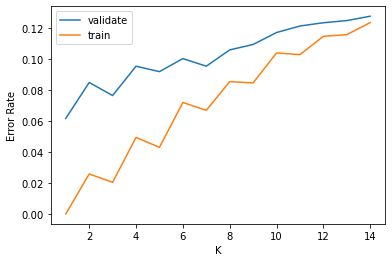

In [200]:
#Ploting the results


klval= []
vlval = []
for k, v in knn_many_split.items():
    klval.append(k)
    vlval.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting k vs error error

plt.plot(klval, vlval, label = 'validate' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [201]:
#We will use k as 10

knn = KNeighborsClassifier(n_neighbors = 10)

#Fitting the training data
knn.fit(X_train_smt, y_train_smt)

#Prediciting on the validation data
y_10nn_p= knn.predict(X_val_s)



In [202]:
#Checking model performance

print(classification_report(y_val, y_10nn_p))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1143
           1       0.86      0.49      0.63       285

    accuracy                           0.88      1428
   macro avg       0.87      0.74      0.78      1428
weighted avg       0.88      0.88      0.87      1428



Without any tuning the model performance is similar to logistic regression, we will use paramerter tuning techinique and evaluate whether model performance improves

In [205]:
# We will try RandomSearch to improve model performance

#Set the parameters to be tuned
param_grid_k = {
    'n_neighbors': [8,10,12], 
    'algorithm' : ['auto','ball_tree','kd_tree'],
    'p': [1,2]
}

#initiating KNN model for tuning, we will use the scoring methods as recall

knn1=KNeighborsClassifier()

#Initialize RandomSearch
random1 = RandomizedSearchCV(estimator=knn1, param_distributions=param_grid_k, 
                            cv = 5, scoring = 'recall', n_jobs=-1, verbose = 2, 
                            random_state = 27)


In [206]:
#Fiting the training data to find the best parameters

random_knn = random1.fit(X_train_smt,y_train_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished


In [207]:
#Print the best parameters

print("Best: %f using %s " % (random_knn.best_score_, random_knn.best_params_))

Best: 0.607512 using {'p': 2, 'n_neighbors': 8, 'algorithm': 'ball_tree'} 


In [213]:
#We will further fine tune the prameters using grid search

param_grid_k1 = {
    'n_neighbors': [6,8,10], 
    'algorithm' : ['ball_tree','kd_tree'],
    'p': [1,2]
}

#Initialize GridSearch

grid1 = GridSearchCV(estimator=knn1, param_grid=param_grid_k1, 
                            cv = 5, scoring = 'recall', n_jobs=-1, verbose = 3, 
                            )

grid_knn = grid1.fit(X_train_smt,y_train_smt)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


In [214]:
#Print the best params

print("Best: %f using %s" % (grid_knn.best_score_, grid_knn.best_params_))

Best: 0.639437 using {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1}


In [265]:
#Using the above params to train the model
knn2 = KNeighborsClassifier(n_neighbors=6,p=1)
knn2.fit(X_train_smt, y_train_smt)

y_prd_k2 =  knn2.predict(X_val_s)


In [266]:
#Checking model performance

print(classification_report(y_val, y_prd_k2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1143
           1       0.93      0.52      0.67       285

    accuracy                           0.90      1428
   macro avg       0.91      0.76      0.80      1428
weighted avg       0.90      0.90      0.89      1428



In [267]:
#Checking the AUC ROC score
pred_probk = knn2.predict_proba(X_val_s)
auc_scorek = roc_auc_score(y_val,pred_probk[:,1])

print('AUC Score', auc_scorek)

AUC Score 0.9200979263556968


KNN model has improved accuracy and AUC score, however th recall value is not good as logistic regression.


### Decision Trees

In [219]:
# Fitting the tree and evaluation using the validation set

knn2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
dtc.fit(X_train_smt, y_train_smt)

y_prd_dt =  dtc.predict(X_val_s)


In [220]:
#Checking model performance

print(classification_report(y_val, y_prd_dt))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1143
           1       0.89      0.84      0.86       285

    accuracy                           0.95      1428
   macro avg       0.93      0.91      0.92      1428
weighted avg       0.95      0.95      0.95      1428



The performance of decision tree is better when compared with Logistic regression, we will tune the parameters and use generalization techiniques to address overfitting.

In [224]:
# We will try RandomSearch to improve model performance

#Set the parameters to be tuned
param_grid_d = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20], 
    'min_samples_leaf' : [5,10,15,20,25],
    'max_features': ['sqrt','log2',None]
}

#initiating DTC model for tuning, we will use the scoring methods as recall

dtc1 = DecisionTreeClassifier(random_state = 27)

#Initialize RandomSearch
random2 = RandomizedSearchCV(estimator=dtc1, param_distributions=param_grid_d, 
                            cv = 5, scoring = 'recall', n_jobs=-1, verbose = 2, 
                            random_state = 27)

#Fiting the training data to find the best parameters

random_dtc = random2.fit(X_train_smt,y_train_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [225]:
#Print the best parameters

print("Best: %f using %s " % (random_dtc.best_score_, random_dtc.best_params_))

Best: 0.759624 using {'min_samples_leaf': 20, 'max_features': None, 'max_depth': 15, 'criterion': 'entropy'} 


In [226]:
#We will further fine tune the prameters using grid search

param_grid_d1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [11,13,15,17], 
    'min_samples_leaf' : [18,20,22],
    'max_features': ['sqrt','log2',None]
}
#Initialize GridSearch

grid2 = GridSearchCV(estimator=dtc1, param_grid=param_grid_d1, 
                            cv = 5, scoring = 'recall', n_jobs=-1, verbose = 3, 
                            )

grid_dtc = grid2.fit(X_train_smt,y_train_smt)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 216 out of 360 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.6s finished


In [227]:
#Print the best parameters

print("Best: %f using %s " % (grid_dtc.best_score_, grid_dtc.best_params_))

Best: 0.768075 using {'criterion': 'entropy', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 18} 


In [241]:
#Using the above params to train the model
dtc2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 27, max_depth=11,
                             min_samples_leaf=18)
dtc2.fit(X_train_smt, y_train_smt)

y_prd_dt1 =  dtc2.predict(X_val_s)



In [242]:
#Checking model performance

print(classification_report(y_val, y_prd_dt1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1143
           1       0.84      0.82      0.83       285

    accuracy                           0.93      1428
   macro avg       0.90      0.89      0.89      1428
weighted avg       0.93      0.93      0.93      1428



In [243]:
#Checking the AUC ROC score
pred_prob1 = dtc2.predict_proba(X_val_s)
auc_score1 = roc_auc_score(y_val,pred_prob1[:,1])

print('AUC Score', auc_score1)

AUC Score 0.9312274562170958


The Decision tree model is having better recall score and correctly seperate the target variable for 93% of the training data. Eventhough the the model is performing better than Logistic Regression, Decision tree suffer from overfitting of data. To overcome this limit we will explore RandomForest model.

## Random Forest

In [246]:
#Initializing baseline model
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 27)
#Fitting the data on the train data set
rfc.fit(X_train_smt, y_train_smt)

#Preidicting the validation data set

y_pred_r = rfc.predict(X_val_s)

In [247]:
#Checking model performance

print(classification_report(y_val, y_pred_r))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1143
           1       0.98      0.84      0.90       285

    accuracy                           0.96      1428
   macro avg       0.97      0.92      0.94      1428
weighted avg       0.96      0.96      0.96      1428



Random Forest performance is best out of the box, we will explore tuning of prametere to see if there is improvement in performance

In [250]:
# We will try RandomSearch to improve model performance

#Set the parameters to be tuned
param_grid_r = {
    'n_estimators': [50,100,300,500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15],
    'min_samples_split' : [5,10,15],
    'min_samples_leaf' : [5,10,15,20,25],
    'max_features': ['sqrt','log2',None],
    'max_leaf_nodes' : [4,6,8]
}

#initiating DTC model for tuning, we will use the scoring methods as recall

rfc1 = RandomForestClassifier(random_state = 27)

#Initialize RandomSearch
random3 = RandomizedSearchCV(estimator=rfc1, param_distributions=param_grid_r, 
                            cv = 5, scoring = 'recall', n_jobs=-1, verbose = 3, 
                            random_state = 27)

#Fiting the training data to find the best parameters

random_rfc = random3.fit(X_train_smt,y_train_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    7.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.6s finished


In [251]:
#Print the best parameters

print("Best: %f using %s " % (random_rfc.best_score_, random_rfc.best_params_))

Best: 0.706103 using {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_leaf_nodes': 8, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'} 


In [254]:
#We will further fine tune the prameters using grid search

param_grid_r1 = {
    'n_estimators': [450,500,550],
    'criterion': ['gini'],
    'max_depth': [8,10,12],
    'min_samples_split' : [13,15,17],
    'min_samples_leaf' : [8,10,12],
    'max_features': [None],
    'max_leaf_nodes' : [8,10]
}
#Initialize GridSearch

grid3 = GridSearchCV(estimator=rfc1, param_grid=param_grid_r1, 
                            cv = 3, scoring = 'recall', n_jobs=-1, verbose = 3, 
                            )

grid_rfc = grid3.fit(X_train_smt,y_train_smt)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  3.6min finished


In [255]:
#Print the best parameters

print("Best: %f using %s " % (random_rfc.best_score_, random_rfc.best_params_))

Best: 0.706103 using {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_leaf_nodes': 8, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'} 


In [262]:
#Fitting model with the tuned parameters


rfc2 = RandomForestClassifier(n_estimators= 100,criterion = 'gini', random_state = 27, max_depth=10)
rfc2.fit(X_train_smt, y_train_smt)

y_prd_rf2 =  rfc2.predict(X_val_s)


In [263]:
#Checking model performance

print(classification_report(y_val, y_prd_rf2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1143
           1       0.98      0.82      0.89       285

    accuracy                           0.96      1428
   macro avg       0.97      0.91      0.93      1428
weighted avg       0.96      0.96      0.96      1428



In [264]:
#Checking the AUC ROC score
pred_prob2 = rfc2.predict_proba(X_val_s)
auc_score2 = roc_auc_score(y_val,pred_prob2[:,1])

print('AUC Score', auc_score2)

AUC Score 0.9769458642231125


The RandomForest model is performing better in terms for Accuracy, Recall metrics. Its also able to classify the target varaible for 97% of the data. We will not explore further models and use Random Forest for classifying the loans